In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wyy_n.csv to wyy_n.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['wyy_n.csv']))
print(df)

           Date  Open  High  Low  Close  Adj Close  Average
0      1/4/2010   7.5   7.8  7.2    7.2        7.2     7.38
1      1/5/2010   7.4   7.4  7.2    7.3        7.3     7.32
2      1/6/2010   7.2   7.3  7.1    7.2        7.2     7.20
3      1/7/2010   7.2   7.4  7.0    7.2        7.2     7.20
4      1/8/2010   7.1   7.5  7.0    7.4        7.4     7.28
...         ...   ...   ...  ...    ...        ...      ...
2635  6/23/2020   7.3   7.3  6.6    6.7        6.7     6.92
2636  6/24/2020   7.0   8.6  6.7    7.0        7.0     7.26
2637  6/25/2020   6.9   7.1  6.9    6.9        6.9     6.94
2638  6/26/2020   6.9   6.9  6.5    6.6        6.6     6.70
2639  6/29/2020   6.5   7.2  6.4    6.9        6.9     6.78

[2640 rows x 7 columns]


In [5]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [6]:
data_training = data_training.drop(['Date'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.27607364, 0.28220859, 0.28387099, 0.2625    , 0.2625    ,
        0.27375001],
       [0.26993867, 0.25766871, 0.28387099, 0.26875   , 0.26875   ,
        0.27000001],
       [0.25766873, 0.25153374, 0.27741937, 0.2625    , 0.2625    ,
        0.26250001],
       ...,
       [0.10429448, 0.10429448, 0.10322581, 0.1       , 0.1       ,
        0.1025    ],
       [0.09815952, 0.08588957, 0.0967742 , 0.08125   , 0.08125   ,
        0.08875   ],
       [0.06748467, 0.09202454, 0.07741936, 0.1       , 0.1       ,
        0.0875    ]])

In [8]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape

(1008, 20, 6)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [15]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [16]:
regressorGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 20, 60)            12240     
                                                                 
 dropout_4 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_5 (GRU)                 (None, 20, 60)            21960     
                                                                 
 dropout_5 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_6 (GRU)                 (None, 20, 80)            34080     
                                                                 
 dropout_6 (Dropout)         (None, 20, 80)            0         
                                                                 
 gru_7 (GRU)                 (None, 120)              

In [17]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 [==============================] - 7s 44ms/step - loss: 0.0354
Epoch 2/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0065
Epoch 3/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0054
Epoch 4/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0051
Epoch 5/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0054
Epoch 6/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0048
Epoch 7/50
32/32 [==============================] - 2s 56ms/step - loss: 0.0051
Epoch 8/50
32/32 [==============================] - 2s 64ms/step - loss: 0.0049
Epoch 9/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0042
Epoch 10/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0037
Epoch 11/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0037
Epoch 12/50
32/32 [==============================] - 2s 55ms/step - loss: 0.0042
Epoch 13/50
32/32 [==================

In [18]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Average
38,3/1/2010,7.7,7.8,7.6,7.7,7.7,7.70
39,3/2/2010,7.8,7.9,7.6,7.8,7.8,7.78
40,3/3/2010,7.9,7.9,7.6,7.8,7.8,7.80
41,3/4/2010,7.7,7.9,7.7,7.8,7.8,7.78
42,3/5/2010,7.7,7.9,7.7,7.8,7.8,7.78


In [19]:
past_20_days = data_testing.tail(20)

In [20]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-20-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close,Average
0,5.9,5.9,5.7,5.8,5.8,5.82
1,5.7,5.9,5.6,5.6,5.6,5.68
2,5.6,5.7,5.4,5.5,5.5,5.54
3,5.4,5.7,5.3,5.5,5.5,5.48
4,5.8,6.4,5.8,6.0,6.0,6.00


In [21]:
inputs = scaler.transform(df)
inputs

array([[0.17791412, 0.16564417, 0.18709679, 0.175     , 0.175     ,
        0.17625   ],
       [0.16564418, 0.16564417, 0.18064517, 0.1625    , 0.1625    ,
        0.1675    ],
       [0.15950921, 0.15337423, 0.16774195, 0.15625   , 0.15625   ,
        0.15875   ],
       ...,
       [0.23926382, 0.2392638 , 0.26451615, 0.24375   , 0.24375   ,
        0.24625001],
       [0.23926382, 0.22699387, 0.23870969, 0.225     , 0.225     ,
        0.23125001],
       [0.21472394, 0.24539877, 0.23225808, 0.24375   , 0.24375   ,
        0.23625001]])

In [22]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1572, 20, 6), (1572,))

In [23]:
x_test.shape

(1572, 20, 6)

In [24]:
y_pred = regressorGRU.predict(x_test)

50/50 [==============================] - 1s 14ms/step


In [25]:
scaler.scale_

array([0.0613497 , 0.06134969, 0.06451613, 0.0625    , 0.0625    ,
       0.0625    ])

In [26]:
scale = 1 / 0.0613497
scale

16.299998207000197

In [27]:
y_pred = y_pred * scale
y_test = y_test * scale

In [28]:
y_pred.shape

(1572, 1)

In [29]:
y_test.shape

(1572,)

In [30]:
y_pred[1503:]

array([[1.0001028 ],
       [0.98595446],
       [1.0205067 ],
       [1.1073399 ],
       [1.1739    ],
       [1.1939578 ],
       [1.2141936 ],
       [1.1954716 ],
       [1.1463258 ],
       [1.1144614 ],
       [1.1069012 ],
       [1.1108499 ],
       [1.1438323 ],
       [1.1799686 ],
       [1.2353022 ],
       [1.2847593 ],
       [1.3209833 ],
       [1.3169235 ],
       [1.2954491 ],
       [1.261408  ],
       [1.2747248 ],
       [1.2811427 ],
       [1.3119373 ],
       [1.3355622 ],
       [1.3442796 ],
       [1.3682393 ],
       [1.3732579 ],
       [1.4156209 ],
       [1.452041  ],
       [1.4782554 ],
       [1.5358222 ],
       [1.8777475 ],
       [2.111768  ],
       [2.1487164 ],
       [2.192882  ],
       [2.216366  ],
       [2.2434664 ],
       [2.2129505 ],
       [2.315676  ],
       [2.5729978 ],
       [2.885124  ],
       [3.3636804 ],
       [3.522833  ],
       [3.1851099 ],
       [3.0783334 ],
       [2.7861426 ],
       [2.5279856 ],
       [2.504

In [31]:
y_test[1503:]

array([0.        , 0.29999999, 0.99999995, 0.69999997, 0.69999997,
       0.69999997, 0.39999998, 0.39999998, 0.39999998, 0.59999997,
       0.49999998, 0.59999997, 0.69999997, 0.89999996, 0.99999995,
       1.19999994, 1.09999995, 1.09999995, 0.99999995, 0.79999996,
       1.19999994, 0.89999996, 1.19999994, 1.09999995, 1.29999994,
       1.09999995, 1.29999994, 1.29999994, 1.39999993, 1.49999993,
       2.29999989, 2.49999988, 2.0999999 , 2.19999989, 2.29999989,
       2.29999989, 2.19999989, 2.29999989, 2.89999986, 3.09999985,
       3.29999984, 3.79999982, 3.39999983, 2.79999986, 3.29999984,
       2.49999988, 2.29999989, 2.59999987, 2.79999986, 2.89999986,
       2.69999987, 2.59999987, 2.39999988, 2.79999986, 3.49999983,
       3.89999981, 2.99999985, 3.09999985, 2.99999985, 3.69999982,
       3.99999981, 6.29999969, 4.89999976, 4.0999998 , 4.29999979,
       3.99999981, 3.89999981, 3.89999981, 3.49999983])

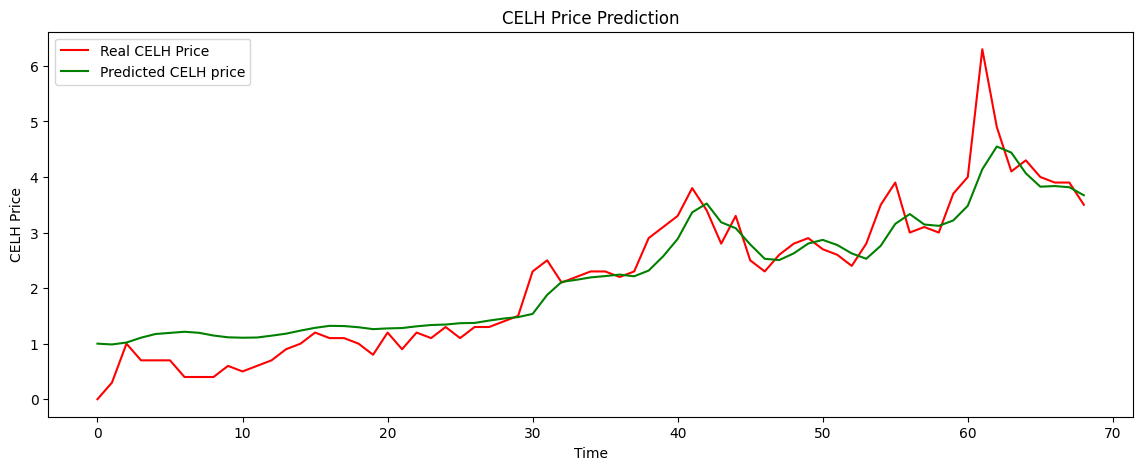

In [32]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1503:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[1503:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()